In [1]:
%load_ext autoreload
%autoreload 2

import os,sys,argparse
from tqdm import tqdm
import torch
import torch.nn as nn
from PIL import Image
from torchvision.transforms import transforms
from  torch.utils.data import DataLoader
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from Dataset.datasets import STL10 , CIFAR100
from Dataset.augmentation import Augmentation
from config.path_config import *
from models.networks import Unet,VAE
from utils.common import *
from train.coach import Coach

/home/bardiya/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the assets

In [5]:
opts = load_json("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/config.json")
opts = argparse.Namespace(**opts)
network = Coach(opts=opts)
network.net

weigths successfully loaded


Unet(
  (down1): Sequential(
    (0): Unet_Convblock(
      (body_list): ModuleList(
        (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu_1): ReLU()
        (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu_2): ReLU()
      )
      (body): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU()
      )
    )
  )
  (down2): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Unet_Convblock(
      (body_list): ModuleList(
        (conv_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu_1): ReLU()
        (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (relu_2): ReLU()
      )
      (body): Sequential(
        (0): Conv2d(64, 128, ke

## Training phase

In [ ]:
network.teach()

## Testing phase

In [13]:
from config.transform_config import Transform_class
image_path_salt_peper = rf"/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/input_salt_peper.jpg"
image_path_gaussian = rf"/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/input_gaussian.jpg"
image_path_uniform = rf"/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/input_uniform.jpg"
output_image_salt_peper = network.test_single(image_path_salt_peper)
output_image_gaussian = network.test_single(image_path_gaussian)
output_image_uniform = network.test_single(image_path_uniform)
output_image_gaussian.save("out_gaussian.png")
output_image_salt_peper.save("out_salt_peper.png")
output_image_uniform.save("out_uniform.png")

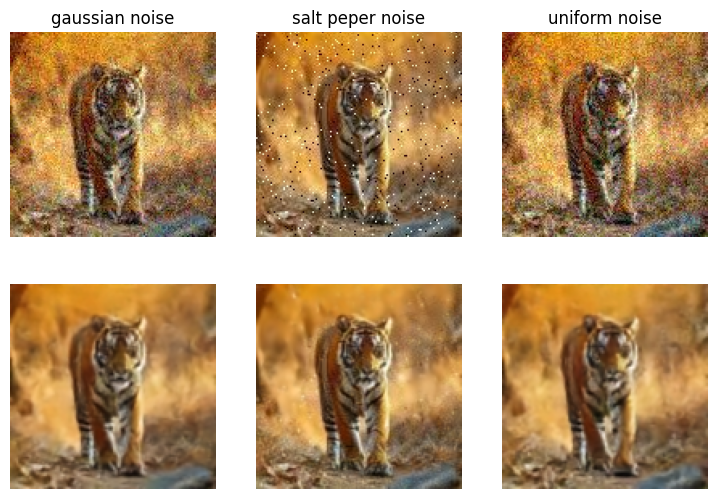

In [77]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2  # Optional for image loading
import numpy as np

inp_1 = Image.open("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/input_gaussian.jpg")
inp_2 = Image.open("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/input_salt_peper.jpg")
inp_3 = Image.open("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/input_uniform.jpg")
out_1 = Image.open("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/out_gaussian.png")
out_2 = Image.open("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/out_salt_peper.png")
out_3 = Image.open("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/out_uniform.png")

images = [inp_1, inp_2, inp_3,
               out_1, out_2, out_3]


titles = ["gaussian noise", "salt peper noise", "uniform noise", 
          "", "", ""]


plt.figure(figsize=(9, 6))

for i, img in enumerate(images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")  
    
plt.savefig("/home/bardiya/projects/ai-side-projects/Deep-Learning-for-Image-Denoising-A-Neural-Restoration-Framework/pictures/ouputs.png")
plt.show()

